Lab - EDA Univariate Analysis: Diving into Amazon UK Product Insights

Objective: Explore the product listing dynamics on Amazon UK to extract actionable business insights. By understanding the distribution, central tendencies, and relationships of various product attributes, businesses can make more informed decisions on product positioning, pricing strategies, and inventory management.

Dataset: This lab utilizes the Amazon UK product dataset which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

Part 1: Understanding Product Categories

Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

    Frequency Tables:
        Generate a frequency table for the product category.
        Which are the top 5 most listed product categories?

    Visualizations:
        Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
        For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [5]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [6]:
df.shape

(2443651, 9)

In [7]:
def get_category(category):
    if category == "Handmade Clothing, Shoes & Accessories":
        return "clothing & accessories"
    else:
        return category
df["category"] = df["category"].apply(get_category)

In [8]:
#1.1 Generate a frequency table for the product category.
product_categories = df["category"].value_counts().sort_values(ascending=False)
product_categories

category
Sports & Outdoors                 836265
Beauty                             19312
clothing & accessories             19229
Bath & Body                        19092
Birthday Gifts                     18978
                                   ...  
Motorbike Chassis                    107
Alexa Built-In Devices               107
Plugs                                107
Smart Home Security & Lighting       104
Smart Speakers                        54
Name: count, Length: 296, dtype: int64

In [9]:
#1.2 Which are the top 5 most listed product categories?
most_listed_product_catgegories = df["category"].value_counts().head(5)
most_listed_product_catgegories_df = most_listed_product_catgegories.reset_index()
most_listed_product_catgegories_df

,category,count
0,Sports & Outdoors,836265
1,Beauty,19312
2,clothing & accessories,19229
3,Bath & Body,19092
4,Birthday Gifts,18978


/var/folders/m3/cvmhd4j11f7968wyg9z4qfdr0000gn/T/ipykernel_6578/3027416774.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="category", y="count", data=most_listed_product_catgegories_df, palette="pastel")


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Sports & Outdoors'),
  Text(1, 0, 'Beauty'),
  Text(2, 0, 'clothing & accessories'),
  Text(3, 0, 'Bath & Body'),
  Text(4, 0, 'Birthday Gifts')])

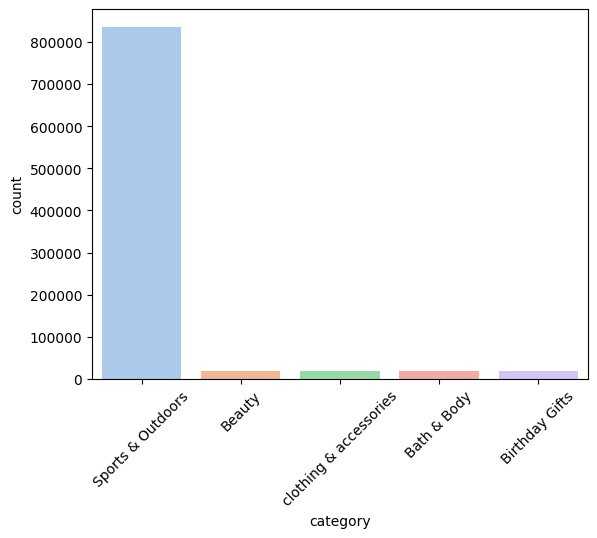

In [10]:
#1.3 Visualizations: display the distribution of products across different categories using a bar chart.
#I will do it for the subset of 5 top categories. 
sns.barplot(x="category", y="count", data=most_listed_product_catgegories_df, palette="pastel")
plt.xticks(rotation=45)

In [11]:
#1.4 For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?
#In order to plot in a pie chart, i will group everything that is not in the top 5 as "others".
def categorize_category(category):
    top_product_categories = ["Sports & Outdoors", "Beauty", "Handmade Clothing, Shoes & Accessories", "Bath & Body", "Birthday Gifts"]
    if category not in top_product_categories:
        return "Other"
    else:
        return category

df_categories = df["category"].apply(categorize_category)
(df_categories.value_counts(normalize=True)*100).round(2)

category
Other                63.43
Sports & Outdoors    34.22
Beauty                0.79
Bath & Body           0.78
Birthday Gifts        0.78
Name: proportion, dtype: float64

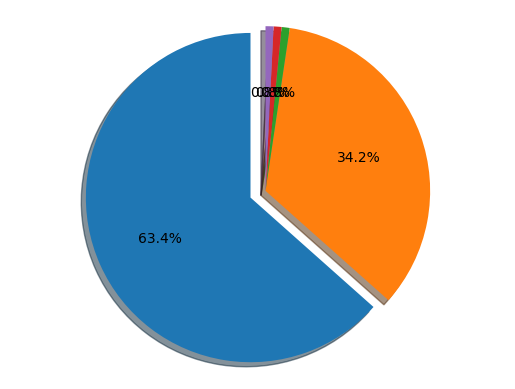

In [12]:
#Ok, let's try to plot it:
#labels = ["Other", "Sports & Outdoors", "Beauty", "Bath & Body", "Birthday Gifts"]
sizes = [63.43, 34.22, 0.79, 0.78, 0.78]
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854']
explode = (0.1, 0, 0, 0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


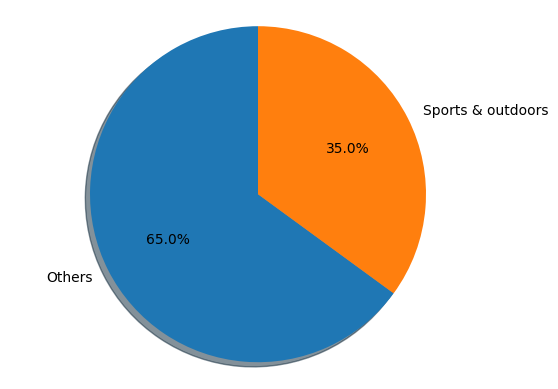

In [13]:
#the plot was horrible, jajaja, because there is a big difference between others, sports and the rest. So, im going to plot only others and sports 
labels = ["Others", "Sports & outdoors"]
sizes = [63.43, 34.22]
colors = ['#66c2a5', '#fc8d62']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Part 2: Delving into Product Pricing

Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

    Measures of Centrality:
        Calculate the mean, median, and mode for the price of products.
        What's the average price point of products listed? How does this compare with the most common price point (mode)?

    Measures of Dispersion:
        Determine the variance, standard deviation, range, and interquartile range for product price.
        How varied are the product prices? Are there any indicators of a significant spread in prices?

    Visualizations:
        Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
        Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

In [14]:
#2.1 Calculate the mean, median and mode for th price of products.
#What's the average price point of products listed? How does this compare with the most common price point (mode)?
print(df["price"].mean().round(2))
print(df["price"].median().round(2))
print(df["price"].mode().round(2)[0])

#the median, that is almost 90 differs a lot from the mode that is almost 10. This suggests that are fewer but more expensive products that are pulling up the mean.

89.24
19.09
9.99


In [29]:
#2.2 Determine the variance, standard deviation, range, and interquantile range for product price.
#How varied are the product prices? Are there any indicators of a significant spread in the prices?
print(f' the standard deviation is: {df["price"].std().round(2)}')
print(f' the variance is:{df["price"].var().round(2)}')
print(f' IQR is: {(df["price"].quantile(0.75).round(2))- (df["price"].quantile(0.25).round(2))}')
print(f' the range is: {df["price"].max().round(2) - df["price"].min().round(2)}')
print(df["price"].quantile(0.75))
#the variance is huuuuuuuuuge

 the standard deviation is: 345.61
 the variance is:119445.49
 IQR is: 36.0
 the range is: 100000.0
45.99


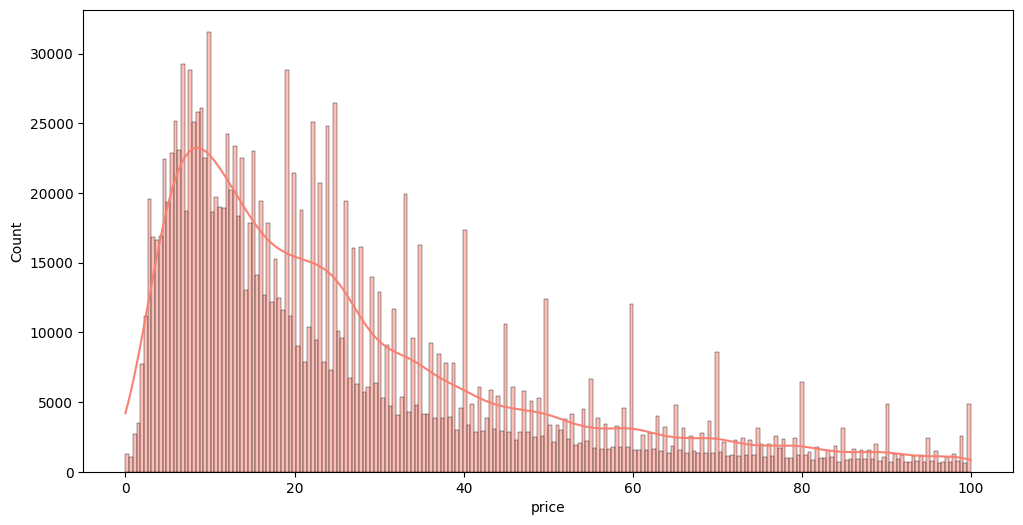

In [25]:
#2.3 Plot a histogram to visualize the distribution of product prices.
price_threshold = 100 
filtered_prices = prices_to_plot[prices_to_plot["price"] < price_threshold]

plt.figure(figsize=(12, 6))
sns.histplot(data=filtered_prices["price"], kde=True, color="salmon", kde_kws={'bw_adjust': 2})
plt.show()


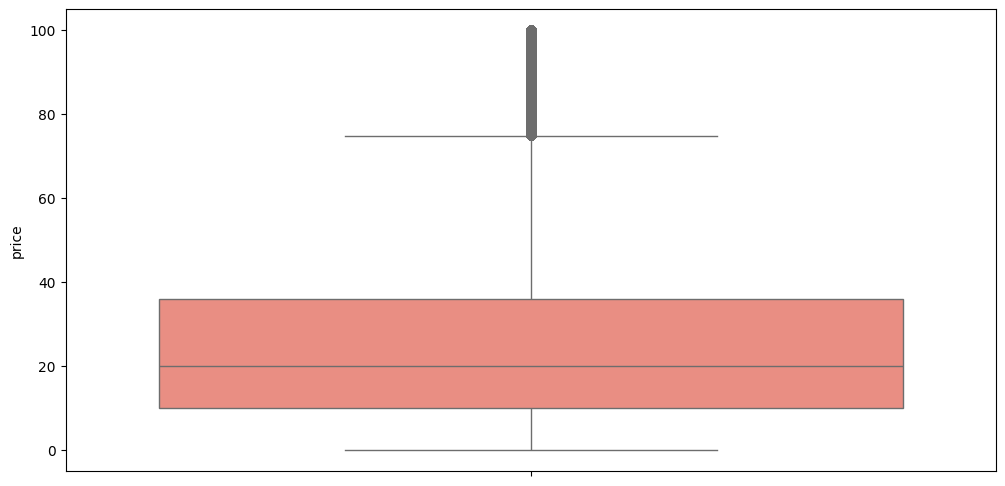

In [37]:
#2.4 Are there products that are priced significantly higher than the rest?
#Use a box plot to showcase the spread and potential outliers in the products.
price_threshold = 100 
filtered_prices = prices_to_plot[prices_to_plot["price"] < price_threshold]

plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_prices["price"], color="salmon")
plt.show()

Part 3: Unpacking Product Ratings

Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

    Measures of Centrality:
        Calculate the mean, median, and mode for the rating of products.
        How do customers generally rate products? Is there a common trend?

    Measures of Dispersion:
        Determine the variance, standard deviation, and interquartile range for product rating.
        Are the ratings consistent, or is there a wide variation in customer feedback?

    Shape of the Distribution:
        Calculate the skewness and kurtosis for the rating column.
        Are the ratings normally distributed, or do they lean towards higher or lower values?

    Visualizations:
        Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

In [31]:
#3.1 calculate the mean, median, and mode for the rating of products.
print(df["stars"].mean().round(2))
print(df["stars"].median())
print(df["stars"].mode()[0]) #common trend is to rate low

2.15
0.0
0.0


In [32]:
#3.2 Determine the variance, standard deviation, and interquantile range for product rating.
print(f' the standard deviation is: {df["stars"].std().round(2)}')
print(f' the variance is:{df["stars"].var().round(2)}')
print(f' IQR is: {(df["stars"].quantile(0.75).round(2))- (df["stars"].quantile(0.25).round(2))}')

 the standard deviation is: 2.19
 the variance is:4.82
 IQR is: 4.4


In [34]:
#3.3 Calculate the skewness and kurtosis for the rating column.
skewness_price = df['stars'].skew().round(2)
kurtosis_price = df['stars'].kurtosis().round(2)

skewness_price, kurtosis_price #the ratings lean towards low values

(np.float64(0.08), np.float64(-1.93))

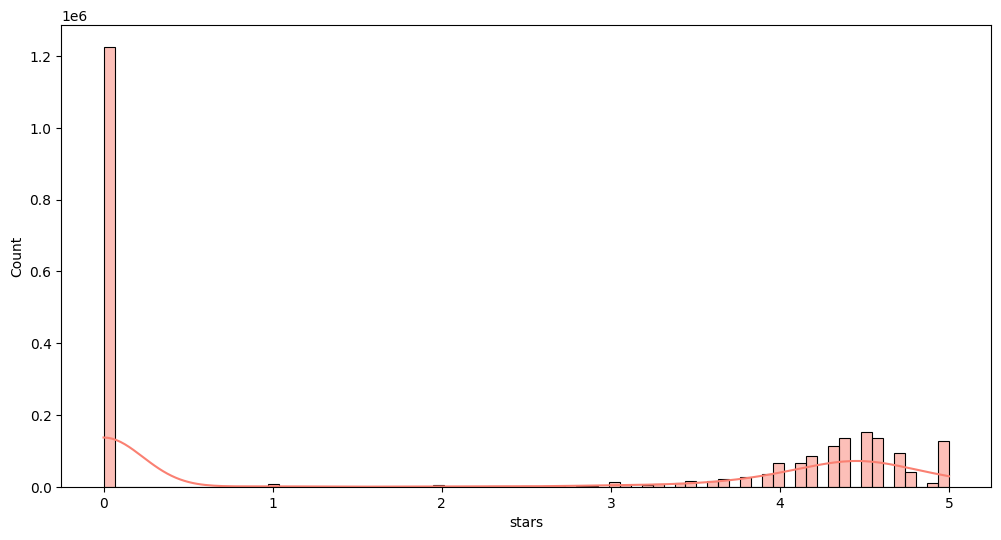

In [36]:
#3.4 Plot a histogram to visualize the distribution of product ratings. 
plt.figure(figsize=(12, 6))
sns.histplot(data=df["stars"], kde=True, color="salmon", kde_kws={'bw_adjust': 2}) #the zero stars rating is the most common
plt.show()